In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils

Using TensorFlow backend.
C:\Users\hello\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hello\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hello\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hello\AppData\Roa

In [2]:
from keras.datasets import mnist
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [3]:
x_Train4D = x_Train.reshape(x_Train.shape[0], 28, 28, 1).astype('float32')
x_Test4D = x_Test.reshape(x_Test.shape[0], 28, 28, 1).astype('float32')

In [4]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [5]:
y_TrainOne = np_utils.to_categorical(y_Train)
y_TestOne = np_utils.to_categorical(y_Test)

from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', input_shape=(28, 28,1), activation='relu'))

In [9]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
model.add(Dropout(0.25))

In [12]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        6416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
__________

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])

In [15]:
# 開始訓練  
train_history = model.fit(x=x_Train4D_normalize,  
                          y=y_TrainOne, validation_split=0.2,  
                          epochs=10, batch_size=300, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1539s 32ms/step - loss: 0.5754 - acc: 0.8200 - val_loss: 0.1162 - val_acc: 0.9659
Epoch 2/10
48000/48000 [==============================] - 1524s 32ms/step - loss: 0.1710 - acc: 0.9495 - val_loss: 0.0785 - val_acc: 0.9757
Epoch 3/10
48000/48000 [==============================] - 1530s 32ms/step - loss: 0.1228 - acc: 0.9632 - val_loss: 0.0593 - val_acc: 0.9824
Epoch 4/10
48000/48000 [==============================] - 1524s 32ms/step - loss: 0.1005 - acc: 0.9697 - val_loss: 0.0530 - val_acc: 0.9838
Epoch 5/10
48000/48000 [==============================] - 1531s 32ms/step - loss: 0.0865 - acc: 0.9739 - val_loss: 0.0479 - val_acc: 0.9860
Epoch 6/10
48000/48000 [==============================] - 1532s 32ms/step - loss: 0.0783 - acc: 0.9764 - val_loss: 0.0463 - val_acc: 0.9854
Epoch 7/10
48000/48000 [==============================] - 1529s 32ms/step - loss: 0.0712 - acc: 0.9786 - val_l

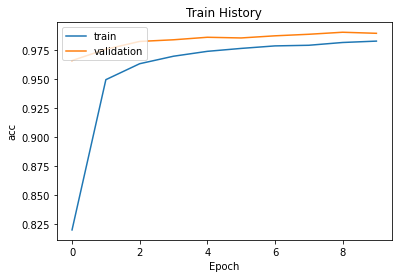

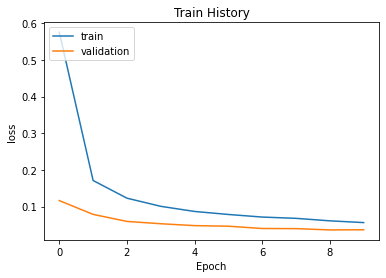

In [16]:
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()
import matplotlib.pyplot as plt
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history, 'loss', 'val_loss')

In [17]:
loss, acc = model.evaluate(x_Test4D_normalize, y_TestOne)
print("\nLoss: %.2f, Accuracy: %.2f%%" %(loss, acc* 100))

10000/10000 [==============================] - 1s 144us/step

Loss: 0.03, Accuracy: 99.02%


In [18]:
import pandas as pd
prediction=model.predict_classes(x_Test4D_normalize)
pd.crosstab(y_Test,prediction,rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,0,0,0,0,0,2,1,2,0
1,0,1132,2,0,0,0,1,0,0,0
2,1,0,1028,0,0,0,0,3,0,0
3,0,0,2,999,0,5,0,2,2,0
4,0,0,1,0,976,0,0,0,0,5
5,1,0,0,2,0,886,2,1,0,0
6,4,2,0,0,1,1,949,0,1,0
7,0,1,7,1,0,1,0,1012,1,5
8,5,0,3,1,1,1,1,2,957,3


In [19]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras.datasets import mnist
(x_Train , y_Train),(x_Test , y_Test) = mnist.load_data()
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D( filters=36, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               225920    
__________

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
# 開始訓練  
train_history=model.fit(x=x_Train4D_normalize, y=y_TrainOneHot,validation_split=0.2, epochs=10, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1520s - loss: 0.4809 - acc: 0.8480 - val_loss: 0.1001 - val_acc: 0.9705
Epoch 2/10
 - 1520s - loss: 0.1349 - acc: 0.9598 - val_loss: 0.0626 - val_acc: 0.9803
Epoch 3/10
 - 1521s - loss: 0.0979 - acc: 0.9710 - val_loss: 0.0512 - val_acc: 0.9853
Epoch 4/10
 - 1521s - loss: 0.0758 - acc: 0.9765 - val_loss: 0.0470 - val_acc: 0.9858
Epoch 5/10
 - 1522s - loss: 0.0665 - acc: 0.9803 - val_loss: 0.0404 - val_acc: 0.9886
Epoch 6/10
 - 1523s - loss: 0.0559 - acc: 0.9828 - val_loss: 0.0428 - val_acc: 0.9883
Epoch 7/10
 - 1517s - loss: 0.0544 - acc: 0.9830 - val_loss: 0.0361 - val_acc: 0.9893
Epoch 8/10
 - 1516s - loss: 0.0461 - acc: 0.9858 - val_loss: 0.0363 - val_acc: 0.9896
Epoch 9/10
 - 1523s - loss: 0.0420 - acc: 0.9869 - val_loss: 0.0327 - val_acc: 0.9903
Epoch 10/10
 - 1521s - loss: 0.0383 - acc: 0.9881 - val_loss: 0.0335 - val_acc: 0.9898


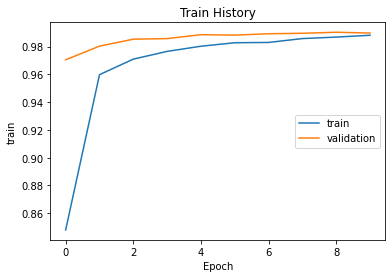

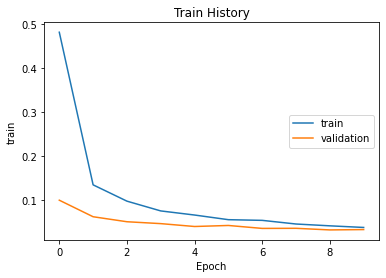

In [21]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()
import matplotlib.pyplot as plt
show_train_history(train_history, 'acc','val_acc')
show_train_history(train_history, 'loss','val_loss')

In [22]:
loss, accuracy = model.evaluate(x_Test4D_normalize , y_TestOneHot)
print( "\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy* 100 ))
import pandas as pd
prediction=model.predict_classes(x_Test4D_normalize)
pd.crosstab(y_Test,prediction,rownames=['label'],
colnames=['predict'])

10000/10000 [==============================] - 2s 167us/step

Loss: 0.02, Accuracy: 99.18%


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,1,0,0,1,0,1,0,0
1,0,1134,1,0,0,0,0,0,0,0
2,1,0,1030,0,0,0,0,1,0,0
3,0,0,1,1006,0,1,0,1,1,0
4,0,1,0,0,977,0,0,1,0,3
5,1,0,0,11,0,877,2,0,0,1
6,5,2,1,0,1,3,946,0,0,0
7,0,2,7,1,0,0,0,1018,0,0
8,2,0,2,3,0,1,0,1,961,4
